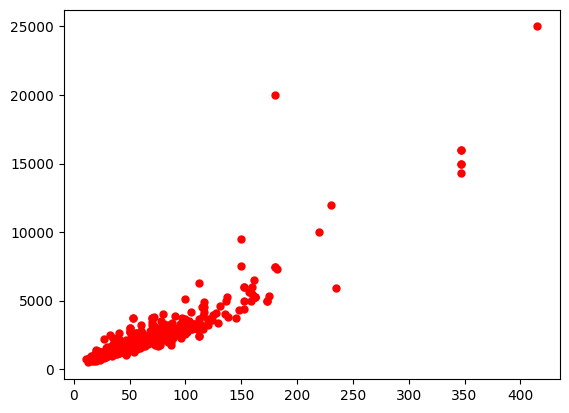

In [47]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house.csv')

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=5)
plt.show()


In [48]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T


# X reprsente la matrice A qui nous permettra de trouver les coefficients a,b t.q ax +b = yi [X * (b, a).T = y]
# print(X)
# print(y)

# Mthode des moindres carrés linaire: Ax = b <=> A.TAx = A.tb <=> x = (A.TA)A.Tb

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T@X)@X.T@y
print(theta)

# theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# print(theta)

[[-283.37836117]
 [  40.97116431]]


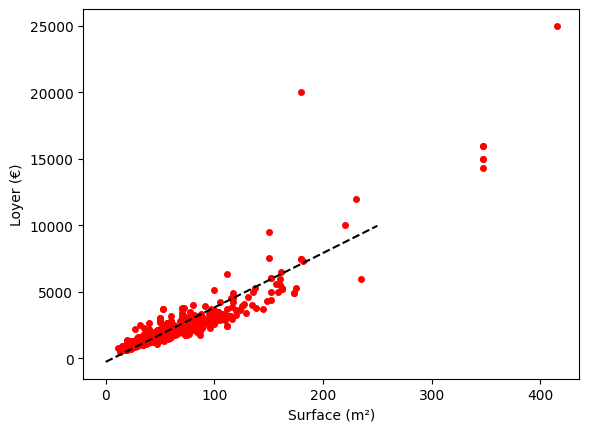

In [49]:
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
# entre 0 et 250 avec 1 point tous les 2m²
# plt.plot([i for i in range(0, 250, 2)], [i*theta[1,0]+theta[0,0] for i in range(0, 250, 2)], linestyle="--")
plt.plot([0,250], [0*theta[1,0]+theta[0,0], 250*theta[1,0]+theta[0,0]], linestyle="--", c="#000000")
plt.xlabel("Surface (m²)")
plt.ylabel("Loyer (€)")

plt.show()

In [50]:
# Si on faire des prévisions:

a = theta[1,0]
b = theta[0,0]
surface = 30
print(f"Pour une surface de {surface}m² le prix prévisionnel est de {b+a*surface}€")

Pour une surface de 30m² le prix prévisionnel est de 945.7565681821163€


In [65]:
# On peut le faire directement avec sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
# X = np.array(X)
# y = np.array(y)
regr.fit(np.array(X), np.array(y))
regr.predict(np.array([[30, 30]]))



array([[945.75656818]])